In [17]:
from scipy.stats import norm, cauchy, logistic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

In [25]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

def weight_4_gen(i, n):
    return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = np.array([weight_4_gen(i, n) for i in range(1, n + 1)])
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

def calculate_statistics(results_df, true_theta):
    """
    Calculate variance, bias, and MSE for each estimator

    Variance: Var(θ̂) = E[(θ̂ - E[θ̂])²]
    Bias: Bias(θ̂) = E[θ̂] - θ
    MSE: MSE(θ̂) = Var(θ̂) + Bias²(θ̂)
    """
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values

        # Variance
        variance = np.var(estimates, ddof=1)

        # Bias
        bias = np.mean(estimates) - true_theta

        # MSE
        mse = variance + bias**2

        stats[col] = {
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    stats_df = pd.DataFrame(stats).T
    return stats_df

def run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=False):
    """
    Run simulation for given parameters and return results with statistics
    """
    weights_unbiased_3 = np.random.rand(n)

    num_estimators = 6 if exclude_est5 else 7
    res = np.empty((num_simulations, num_estimators))

    for i in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        if exclude_est5:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]
        else:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_5(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]

    if exclude_est5:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est6', 'Est7']
    else:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est5', 'Est6', 'Est7']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df

## Initial exploration with θ=0, σ=1, n=50

In [26]:
theta = 0
sigma = 1
n = 50

res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=False)

print(f"Statistics for θ={theta}, σ={sigma}, n={n}")
print(stats_df)

Statistics for θ=0, σ=1, n=50
        Variance      Bias         MSE
Est1    0.019408  0.006955    0.019456
Est2    0.030359  0.011403    0.030489
Est3    0.026411  0.012145    0.026559
Est4    0.009469  0.968201    0.946882
Est5  828.178540  0.696807  828.664079
Est6    0.521812  0.008060    0.521877
Est7    0.009730  0.991986    0.993767


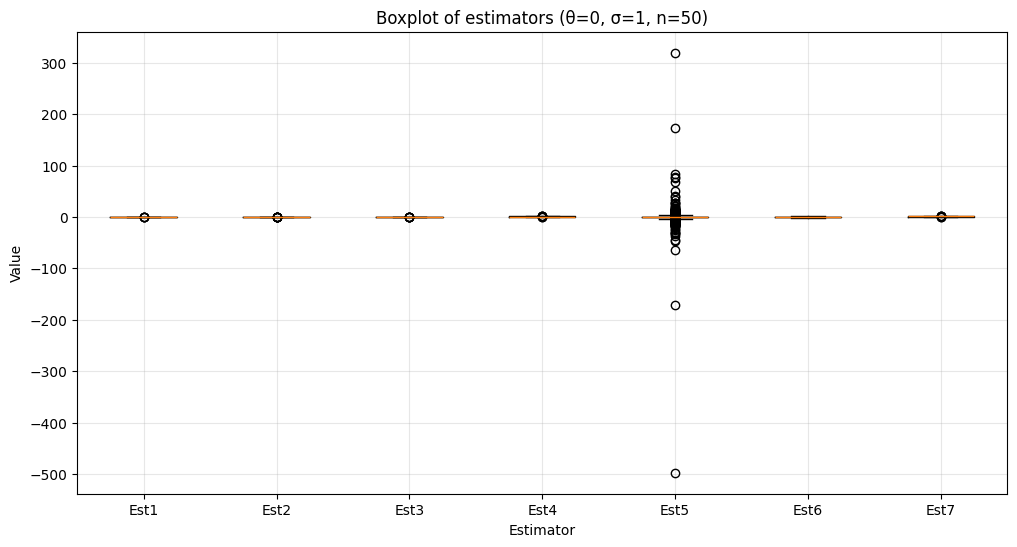

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df)
plt.title(f'Boxplot of estimators (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.gca().set_xticklabels(res_df.columns)
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
# Without estimator 5 (harmonic mean - causes issues with values near 0)
res_df_no5, stats_df_no5 = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=True)

print(f"\nStatistics without θ̂₅ for θ={theta}, σ={sigma}, n={n}")
print(stats_df_no5)


Statistics without θ̂₅ for θ=0, σ=1, n=50
      Variance      Bias       MSE
Est1  0.019752  0.002988  0.019761
Est2  0.031460  0.005863  0.031495
Est3  0.027204  0.002553  0.027210
Est4  0.010065  0.975295  0.961266
Est6  0.509635 -0.006571  0.509679
Est7  0.010254  0.999034  1.008324


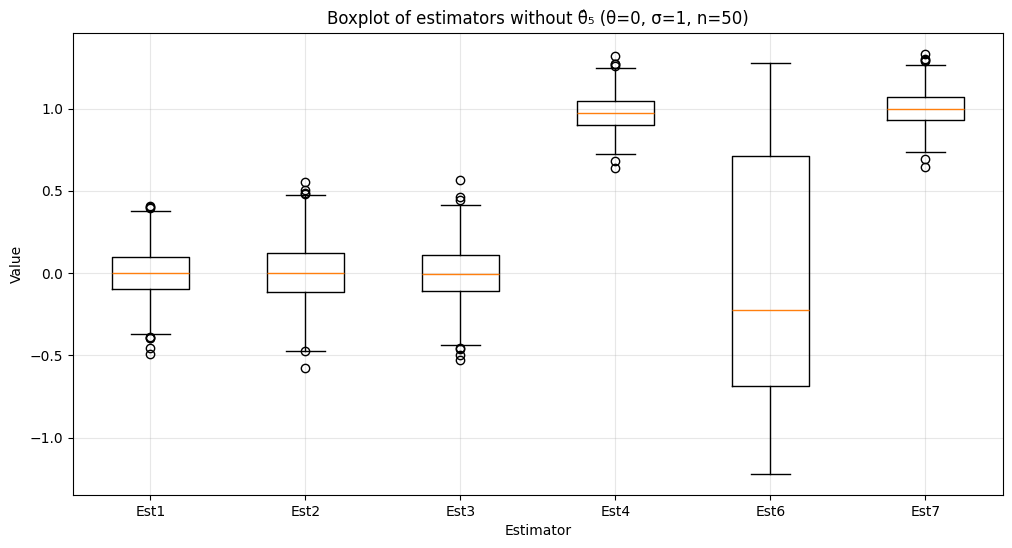

In [23]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df_no5)
plt.title(f'Boxplot of estimators without θ̂₅ (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.gca().set_xticklabels(res_df_no5.columns)
plt.grid(True, alpha=0.3)
plt.show()


## Complete analysis for different n, θ, and σ combinations


Parameters: n=20, θ=0, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0511  0.0030  0.0511
Est2    0.0751  0.0020  0.0751
Est3    0.0625  0.0048  0.0625
Est4    0.0233  0.9332  0.8941
Est6    0.6843  0.0183  0.6846
Est7    0.0248  0.9896  1.0040


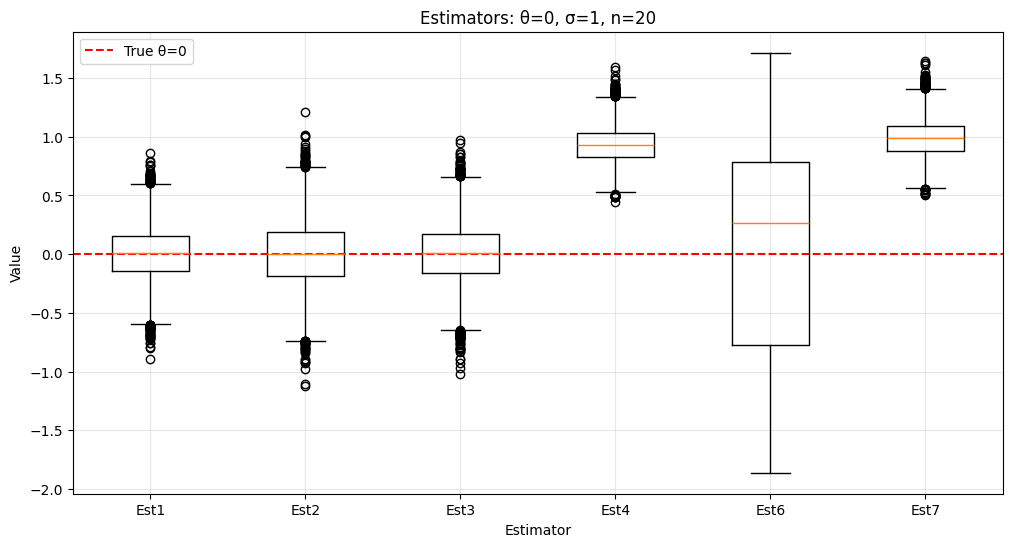


Parameters: n=20, θ=0, σ=2

Statistics:
      Variance    Bias     MSE
Est1    0.1997  0.0001  0.1997
Est2    0.2963  0.0028  0.2964
Est3    0.2721  0.0017  0.2721
Est4    0.0919  1.8674  3.5790
Est6    2.7256 -0.0015  2.7256
Est7    0.0969  1.9798  4.0164


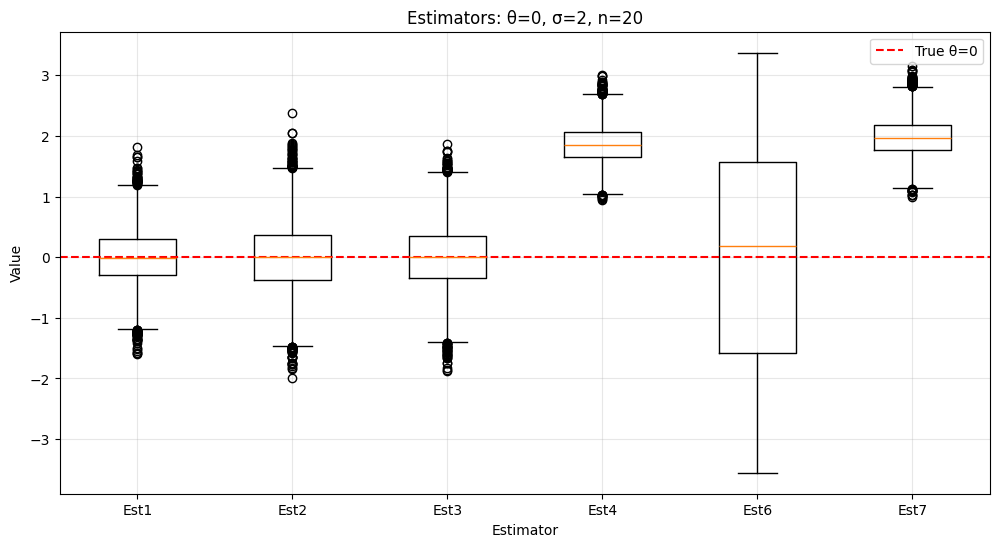


Parameters: n=20, θ=4, σ=1

Statistics:
      Variance    Bias     MSE
Est1    0.0497 -0.0003  0.0497
Est2    0.0734  0.0016  0.0734
Est3    0.0659 -0.0033  0.0660
Est4    0.0234 -3.0690  9.4424
Est6    0.0500  0.2235  0.1000
Est7    0.0485  0.1168  0.0621


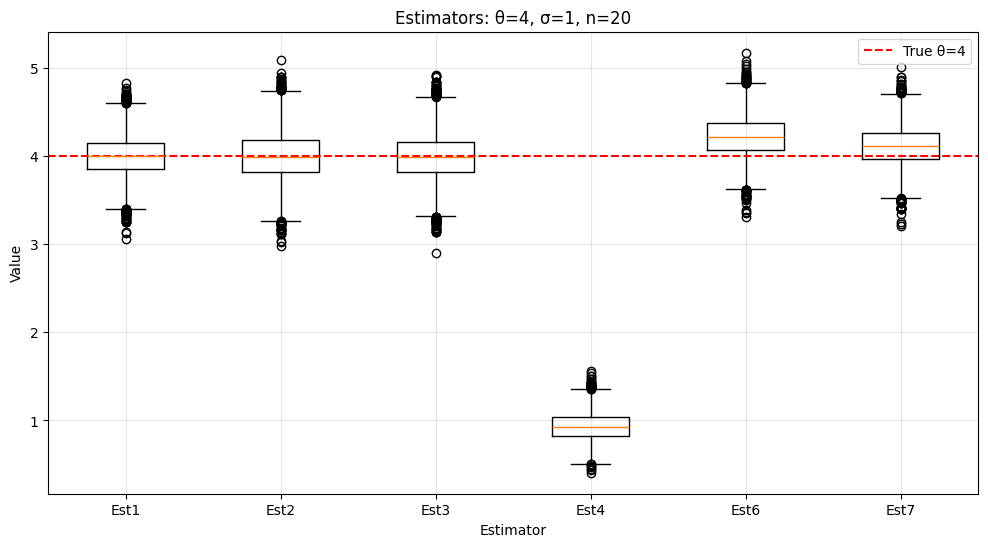


Parameters: n=20, θ=4, σ=2


KeyboardInterrupt: 

In [24]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]

        print(f"\n{'='*60}")
        print(f"Parameters: n={n}, θ={theta}, σ={sigma}")
        print(f"{'='*60}")

        res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=True)

        print("\nStatistics:")
        print(stats_df.round(4))


        # Plot boxplot
        plt.figure(figsize=(12, 6))
        plt.boxplot(res_df)
        plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n}')
        plt.xlabel('Estimator')
        plt.ylabel('Value')
        plt.axhline(y=theta, color='r', linestyle='--', label=f'True θ={theta}')
        plt.gca().set_xticklabels(res_df.columns)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


## Summary comparison table

# Zadanie 2

In [ ]:
def calculate_statistics_dist(results_df, true_theta):
    """Calculate statistics for distribution comparison"""
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values
        variance = np.var(estimates, ddof=1)
        bias = np.mean(estimates) - true_theta
        mse = variance + bias**2

        stats[col] = {
            'Mean': np.mean(estimates),
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    return pd.DataFrame(stats).T

def run_distribution_comparison(theta, sigma, n, num_simulations=10000):
    """Compare mean and median estimators across different distributions"""
    res_norm = []
    res_cauchy = []
    res_logistic = []

    for _ in range(num_simulations):
        norm_vector = norm.rvs(loc=theta, scale=sigma, size=n)
        cauchy_vector = cauchy.rvs(loc=theta, scale=sigma, size=n)
        logistic_vector = logistic.rvs(loc=theta, scale=sigma, size=n)

        est_norm_mean = norm_vector.mean()
        est_norm_med = np.median(norm_vector)
        res_norm.append([est_norm_mean, est_norm_med])

        est_cauchy_mean = cauchy_vector.mean()
        est_cauchy_med = np.median(cauchy_vector)
        res_cauchy.append([est_cauchy_mean, est_cauchy_med])

        est_logistic_mean = logistic_vector.mean()
        est_logistic_med = np.median(logistic_vector)
        res_logistic.append([est_logistic_mean, est_logistic_med])

    df_norm = pd.DataFrame(res_norm, columns=['Mean', 'Median'])
    df_cauchy = pd.DataFrame(res_cauchy, columns=['Mean', 'Median'])
    df_logistic = pd.DataFrame(res_logistic, columns=['Mean', 'Median'])

    stats_norm = calculate_statistics_dist(df_norm, theta)
    stats_cauchy = calculate_statistics_dist(df_cauchy, theta)
    stats_logistic = calculate_statistics_dist(df_logistic, theta)

    return {
        'norm': (df_norm, stats_norm),
        'cauchy': (df_cauchy, stats_cauchy),
        'logistic': (df_logistic, stats_logistic)
    }


In [ ]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for theta, sigma in zip(thetas, sigmas):
    print(f"\n{'='*60}")
    print(f"Distribution Comparison: θ={theta}, σ={sigma}, n={n}")
    print(f"{'='*60}")

    results = run_distribution_comparison(theta, sigma, n, num_simulations=10000)

    # Print statistics
    print("\nNormal Distribution:")
    print(results['norm'][1].round(4))

    print("\nCauchy Distribution:")
    print(results['cauchy'][1].round(4))

    print("\nLogistic Distribution:")
    print(results['logistic'][1].round(4))

    # Plot boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].boxplot(results['norm'][0])
    axes[0].set_title('Normal Distribution')
    axes[0].set_xticklabels(['Mean', 'Median'])
    axes[0].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[0].grid(True, alpha=0.3)

    axes[1].boxplot(results['cauchy'][0])
    axes[1].set_title('Cauchy Distribution')
    axes[1].set_xticklabels(['Mean', 'Median'])
    axes[1].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[1].grid(True, alpha=0.3)

    axes[2].boxplot(results['logistic'][0])
    axes[2].set_title('Logistic Distribution')
    axes[2].set_xticklabels(['Mean', 'Median'])
    axes[2].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[2].grid(True, alpha=0.3)

    fig.suptitle(f'Estimator Comparison: θ={theta}, σ={sigma}, n={n}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Zadanie 3

In [ ]:
def run_simulation3(k, theta=0, sigma=1, n=49, num_simulations=10000):
    res = []
    for _ in range(num_simulations):
        theta_hat = np.append(norm.rvs(theta, sigma, n), k)

        est_31 = np.mean(theta_hat)
        est_32 = np.median(theta_hat)
        res.append([est_31, est_32])

    columns = ['theta_hat_1', 'theta_hat_2']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df


In [ ]:
theta = 0
sigma = 1
n = 49

for k in range(10, 101, 10):
    res_df, stats_df = run_simulation3(k, theta=theta, sigma=sigma, n=n, num_simulations=10000)

    print(f'\nStatistics:   k={k}')
    print(stats_df.round(4))

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n + 1}, k={k}')
    plt.xlabel('Estimator')
    plt.ylabel('Value')
    plt.axhline(y=theta, color='r', linestyle='--', label=f'True θ={theta}')
    plt.set_xticklabels(['Mean', 'Median'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Zadanie 4

In [ ]:
def est_41(theta_hat):
    return np.sum((theta_hat - np.mean(theta_hat)) ** 2) / (n - 1)

def est_42(theta_hat):
    return np.sum((theta_hat - np.median(theta_hat)) ** 2) / (n - 1)

def est_43(theta_hat):
    return np.median((theta_hat - np.mean(theta_hat)) ** 2)

In [ ]:
def run_simulation4(theta, sigma, n, num_simulations=10000):
    """
    Run simulation for given parameters and return results with statistics
    """
    res = []

    for _ in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)


        res.append([
            est_41(theta_hat),
            est_42(theta_hat),
            est_43(theta_hat),
        ])


    columns = ['Est1', 'Est2', 'Est3']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df

In [ ]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 4, 1, 4]

for i in range(4):
    theta, sigma = thetas[i], sigmas[i]

    print(f"\n{'='*60}")
    print(f"Parameters: n={n}, θ={theta}, σ={sigma}")
    print(f"{'='*60}")

    res_df, stats_df = run_simulation4(theta, sigma, n, num_simulations=10000)

    print("\nStatistics:")
    print(stats_df.round(4))

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estimators: θ={theta}, σ={sigma}, n={n}')
    plt.xlabel('Estimator')
    plt.ylabel('Value')
    plt.axhline(y=sigma, color='r', linestyle='--', label=f'True σ={sigma}')
    plt.gca().set_xticklabels(res_df.columns)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
